# **1. 분류와 회귀**
- 분류 : 미리 정의된 여러 클래스 레이블 중 하나를 예측하는 것.
    - 분류하고자 하는 클래스가 2개인 경우 이진 분류, 3개 이상인 경우 다중 분류라고 한다.
    - 이진 분류에서는 양성 (positive) / 음성 (negative) 클래스로 나뉜다.
    
    
- 회귀 : 데이터 특성을 이용하여 실수 수치를 예측하는 것.

## **1-1. 지도 학습 알고리즘**
- 분류 예제를 위한 데이터 셋은 scikit-learn의 위스코신 유방암 데이터 셋을 이용한다.
    - 유방암 임상 데이터를 기반으로 종양이 양/악성임을 분류하도록 하는 데이터 셋이다.
    - scikit-learn 데이터 셋은 실제 데이터와 데이터 셋 관련 정보를 담고 있는 Bunch 객체에 저장되어 있다.
        - Bunch 객체는 딕셔너리와 비슷하지만 점 표기법으로 사용할 수 있다.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

## 그래프나 데이터 적재와 관련된 코드가 구현되어 있는 유틸리티 패키지이다.
import mglearn

Text(0, 0.5, 'feature 2')

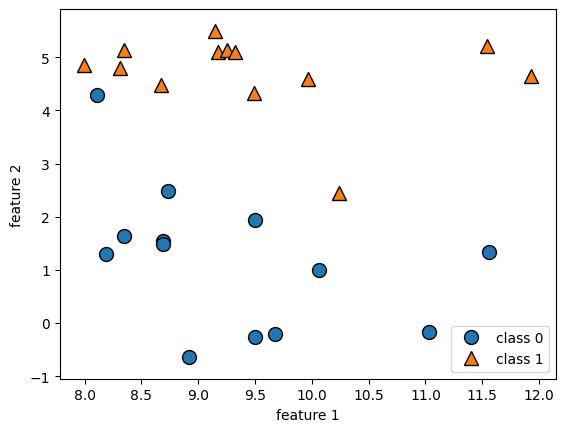

In [2]:
## forge 데이터 셋은 인위적으로 만들어진 이진 분류 데이터 셋이다.
x, y = mglearn.datasets.make_forge()

## x축은 첫 번째 특성, y축은 두 번째 특성을 나타내는 산점도를 그린다.
## 점의 색과 모양은 데이터 포인트가 속한 클래스를 나타낸다.
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(['class 0', 'class 1'], loc = 4)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [3]:
cancer = load_breast_cancer()
print(f'keys : {cancer.keys()}')
print(f'dataset shape : {cancer.data.shape}')

keys : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
dataset shape : (569, 30)


- 유방암 데이터 셋은 30개의 특성과 569개의 데이터 포인트를 가지고 있다.
- 569개의 데이터 셋 중 212개는 악성, 357개는 양성 데이터이다.

In [4]:
dist_ = {k : v for k, v in zip(cancer.target_names, 
                      np.bincount(cancer.target))}
print(f'[클래스 별 샘플 개수] \n{dist_}')

## feature_name를 이용하여 각 특성의 의미를 파악할 수 있다.
print(f'[특성 이름] \n{cancer.feature_names}')

[클래스 별 샘플 개수] 
{'malignant': 212, 'benign': 357}
[특성 이름] 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### **1-1.1. k-최근접 이웃 (kNN / k-Nearest Neighbors)**
- 특정 데이터 포인트에서 가장 가까운 k개의 이웃을 찾는 알고리즘이다.
    - 둘 이상의 이웃을 선택할 때 각 레이블에 속하는 이웃이 몇 개인지 계산하여 더 많은 클래스로 레이블을 지정한다.

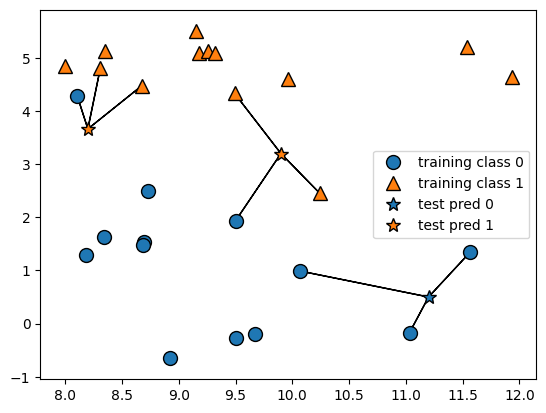

In [5]:
## 아래 코드는 k = 3일 때 사용하는 예제이다.
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [6]:
## scikit-learn의 kNN을 사용해보자.
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 99)

In [7]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [8]:
## 테스트 데이터 셋에 대해서는 predict 메서드를 호출해 예측한다.
## 데이터 포인트에 대해 학습 데이터 셋에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾는다.
print(f'테스트 세트 정답  : {test_y}')
print(f'테스트 세트 예측  : {clf.predict(test_x)}')
print(f'테스트 세트 정확도 : {clf.score(test_x, test_y)*100:.2f}%')

테스트 세트 정답  : [0 0 1 0 1 0 0]
테스트 세트 예측  : [0 0 1 0 1 0 0]
테스트 세트 정확도 : 100.00%


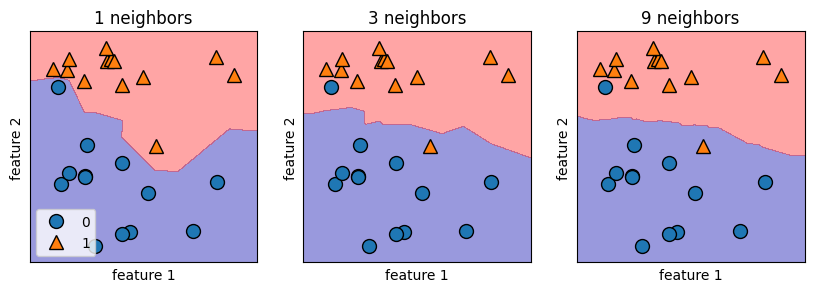

In [9]:
## 클래스 별로 지정한 영역으로 나뉘는 결정 경계 (decision boundary)를 볼 수 있다.
## 아래 코드는 k= 1, 3, 9때의 결정 경계를 보여준다.

_, axes = plt.subplots(1, 3, figsize = (10, 3))
for k, ax in zip([1, 3, 9], axes):
    
    clf = KNeighborsClassifier(n_neighbors = k).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill = True,
                                    eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax = ax)
    ax.set_title(f'{k} neighbors')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    
axes[0].legend(loc = 3)

- k = 1일 때, 결정 경계가 훈련 데이터에 가깝게 따라가고, k가 커질수록 모델이 더 단순해 진다.
    - k를 학습데이터 수와 동일하게 한다면, 모든 데이터 포인트가 같은 이웃을 가지므로,   
      새로운 데이터 포인트를 입력했을 때 모두 같은 예측값을 가지게 된다.
- 아래 코드는 위스콘신 유방암 데이터 셋을 이용한 예제이다.

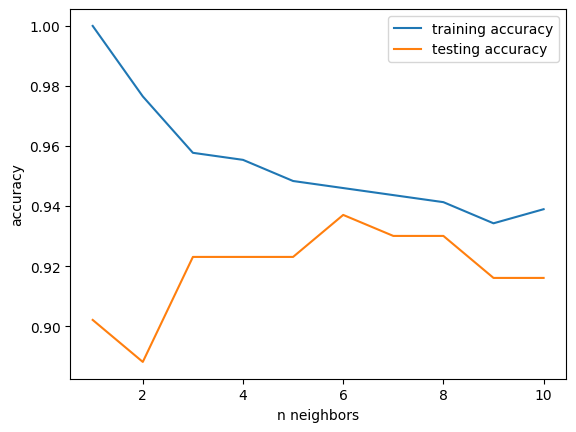

In [10]:
train_x, test_x, train_y, test_y = train_test_split(
                                    cancer.data, cancer.target, 
                                    stratify = cancer.target, random_state = 66
                                )
train_acc, test_acc = [], []
for k in range(1, 11):
    
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(train_x, train_y)
    
    train_acc.append(clf.score(train_x, train_y))
    test_acc.append(clf.score(test_x, test_y))
    
plt.plot(range(1, 11), train_acc, label = 'training accuracy')
plt.plot(range(1, 11),  test_acc, label =  'testing accuracy')

plt.ylabel("accuracy")
plt.xlabel("n neighbors")
plt.legend()

- 위 그래프에서 k가 커질수록 학습 정확도는 떨어지는 반면,  
  시험 데이터 셋은 k가 1일 때가 k가 컸을때보다 정확도가 낮았다.
    - 이는 k = 1일 때 모델을 너무 복잡하게 만들어 과적합 되었음을 보이고,  
      k = 10일때는 모델이 너무 단순화 되어 과소적합으로 인해 오히려 정확도가 떨어졌음을 보인다.
      
### :warning: 과대적합(over-fitting)과 과소적합(under-fitting)
- 모델이 처음보는 데이터에 대해 정확하게 예측할 수 있으면 학습 셋에서 테스트 셋으로 일반화 되었다고 한다.
- 모델이 너무 복잡해져 새로운 데이터에 일반화되기 어려워지는 것을 과대 적합이라고 한다.
- 데이터의 특성과 다양성을 잡아내지 못하는 너무 단순한 모델이 되는 것을 과소 적합이라고 한다.

# **99. 참고자료**
## **99-1. 도서**  
- 파이썬 라이브러리를 활용한 머신러닝 | 안드레아스 뮐러, 박해선 역 / 한빛미디어
## **99-2. 논문, 학술지**

## **99-3. 웹 사이트**

## **99-4. 데이터셋 출처**